In [27]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


In [28]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.head(5))
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [29]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
train['allarea'] = train['1stFlrSF']+train['2ndFlrSF']+train['BsmtFinSF1']
test['allarea'] = test['1stFlrSF']+test['2ndFlrSF']+test['BsmtFinSF1']
#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 81) 
The test data size after dropping Id feature is : (1459, 80) 


## Data Processing

### Outliers (deleting probably wrong data)

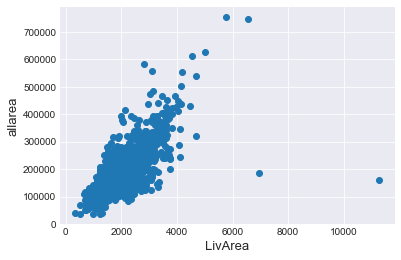

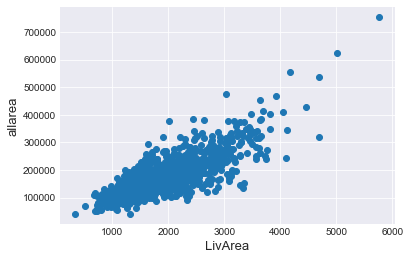

In [33]:
fig, ax = plt.subplots()

ax.scatter(x = train['allarea'], y = train['SalePrice'])
plt.ylabel('allarea', fontsize=13)
plt.xlabel('LivArea', fontsize=13)
plt.show()
#only_normal sale condition
x_norm=train.loc[(train['SaleCondition'] == "Normal")]
y_norm=x_norm['SalePrice']
fig, ax = plt.subplots()

ax.scatter(x = x_norm['allarea'], y = y_norm)
plt.ylabel('allarea', fontsize=13)
plt.xlabel('LivArea', fontsize=13)
plt.show()